Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Krish\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Krish\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Krish\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Datasets

In [2]:
from tensorflow.keras.datasets import mnist

Features and Labels

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

image

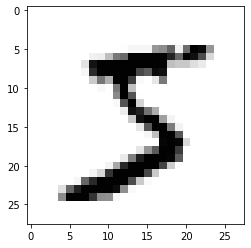

In [6]:
s1 = X_train[0,:,:]
plt.imshow(s1, cmap='Greys')

In [7]:
print(s1.min(),s1.max())

0 255


label

In [8]:
print(y_train[0])

5


In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
# one hot encode target values
y_train = to_categorical(y_train, dtype = 'uint8')
y_test = to_categorical(y_test, dtype = 'uint8')

In [11]:
y_test.shape

(10000, 10)

reshapeing

In [12]:
X_train = X_train.reshape((60000, -1))
X_test = X_test.reshape((10000, -1))

In [13]:
X_train.shape

(60000, 784)

normalising

In [14]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

## Model Setup

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Dense(64, input_dim = 784, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))   # number of categories = 10, sigmoid 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


## Training

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   #bce, metrics=['accuracy','categorical_crossentropy']

In [19]:
hist = model.fit(x = X_train, y = y_train, batch_size=16, validation_data=(X_test,y_test), epochs=20,verbose=1)

Epoch 1/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2580 - accuracy: 0.9239 - val_loss: 0.1495 - val_accuracy: 0.9539
Epoch 2/20
3750/3750 [==============================] - 6s 1ms/step - loss: 0.1203 - accuracy: 0.9636 - val_loss: 0.1230 - val_accuracy: 0.9625
Epoch 3/20
3750/3750 [==============================] - 6s 1ms/step - loss: 0.0886 - accuracy: 0.9727 - val_loss: 0.0946 - val_accuracy: 0.9688
Epoch 4/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0717 - accuracy: 0.9774 - val_loss: 0.0921 - val_accuracy: 0.9722
Epoch 5/20
3750/3750 [==============================] - 6s 1ms/step - loss: 0.0586 - accuracy: 0.9813 - val_loss: 0.0953 - val_accuracy: 0.9718
Epoch 6/20
3750/3750 [==============================] - 6s 1ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.1032 - val_accuracy: 0.9704
Epoch 7/20
3750/3750 [==============================] - 6s 1ms/step - loss: 0.0435 - accuracy: 0.9859 - val_loss: 0.0954 - val_accuracy:

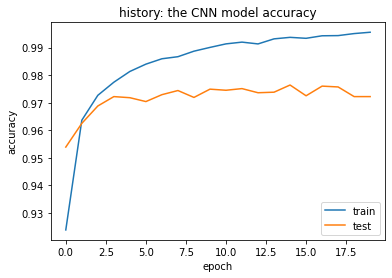

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('history: the CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

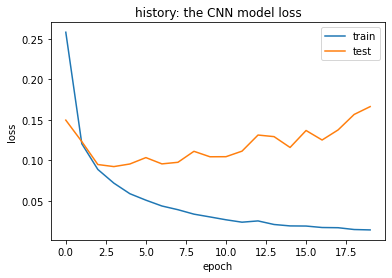

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('history: the CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Evaluating Model

In [22]:
# evaluate model
_, acc = model.evaluate(X_test,y_test, verbose=0)
print(acc*100)

97.21999764442444


## Predicting on single value

In [24]:
x1 = X_test[0,:]
x1 = x1.reshape(1,-1)

In [25]:
y1 = model.predict(x1)  

In [26]:
print(np.argmax(y1))  #list value  

7


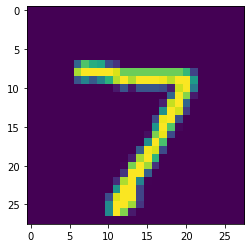

In [27]:
plt.imshow(x1.reshape(28,28,1))

## Save Model

In [28]:
model.save('model12.h5')

save weights only

In [29]:
# model.save_weights('w234.h5')

re load model

In [30]:
from tensorflow.keras.models import load_model

In [31]:
model= load_model('model12.h5')

In [32]:
# model.load_weights('w234.h5')

Exercise

In [33]:
# model.add(BatchNormalization())
# opt = SGD(learning_rate=0.01, momentum=0.9)
# dropout layer